# Word Embeddings Explorer

This interactive notebook demonstrates how words are represented as vectors in language models. Understanding word embeddings is crucial because they capture semantic relationships between words.

## What are Word Embeddings?

Word embeddings are dense vector representations of words where semantically similar words are mapped to nearby points in the vector space. These representations are learned from large text corpora and capture meaningful semantic and syntactic relationships between words.

## What You'll Learn

- How words are represented as vectors in embedding space
- Visualizing word relationships in 2D/3D space
- Exploring word similarities and analogies (e.g., king - man + woman = queen)
- Finding nearest neighbors in embedding space
- How embeddings capture semantic meaning


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets

from IPython.display import display, HTML, clear_output
import gensim.downloader as api


import plotly.express as px


import plotly.graph_objects as go


from mpl_toolkits.mplot3d import Axes3D
import warnings



warnings.filterwarnings("ignore")



# Set styling


plt.style.use("ggplot")


sns.set_palette("viridis")

## Loading Pre-trained Word Embeddings

We'll use pre-trained word embeddings from the Gensim library. These models have been trained on large text corpora and capture rich semantic information.


In [2]:
# Display available pre-trained models
available_models = [
    "glove-wiki-gigaword-100",  # GloVe embeddings trained on Wikipedia and Gigaword
    "word2vec-google-news-300",  # Word2Vec trained on Google News
    "fasttext-wiki-news-subwords-300",  # FastText with subword information
]

print("Available pre-trained embedding models:")
for model in available_models:
    print(f"- {model}")

# Let's load a smaller model for faster processing in this demo
print("\nLoading GloVe embeddings (this may take a moment)...")
glove_model = api.load("glove-wiki-gigaword-100")
print(f"Loaded! Vocabulary size: {len(glove_model.key_to_index):,} words")
print(f"Vector dimensionality: {glove_model.vector_size} dimensions")

Available pre-trained embedding models:
- glove-wiki-gigaword-100
- word2vec-google-news-300
- fasttext-wiki-news-subwords-300

Loading GloVe embeddings (this may take a moment)...
[==================================================] 100.0% 128.1/128.1MB downloaded
Loaded! Vocabulary size: 400,000 words
Vector dimensionality: 100 dimensions


## Basic Word Vector Operations

Let's explore how to access word vectors and perform basic operations with them.


Vector for 'computer': Shape (100,)
First 10 dimensions: [-0.16298   0.30141   0.57978   0.066548  0.45835  -0.15329   0.43258
 -0.89215   0.57747   0.36375 ]


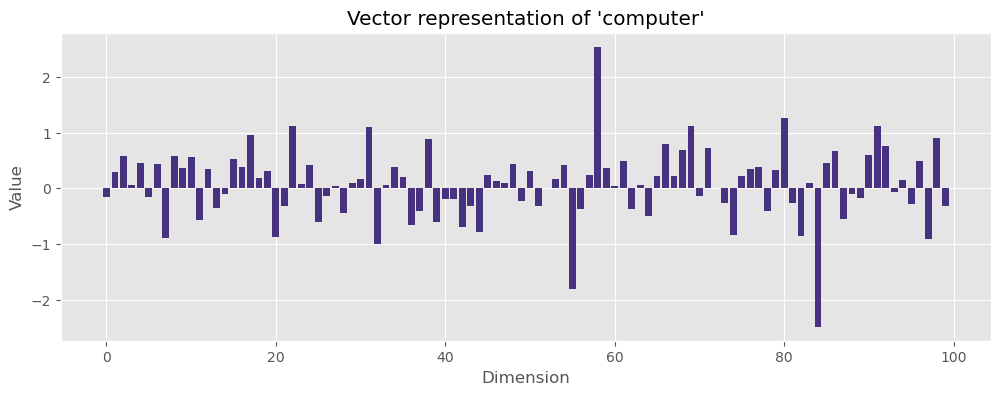

In [3]:
# Get the vector for a single word
word = "computer"
if word in glove_model:
    vector = glove_model[word]

    # Display the vector shape and first few dimensions
    print(f"Vector for '{word}': Shape {vector.shape}")
    print(f"First 10 dimensions: {vector[:10]}")

    # Plot the vector values
    plt.figure(figsize=(12, 4))
    plt.bar(range(len(vector)), vector)
    plt.title(f"Vector representation of '{word}'")
    plt.xlabel("Dimension")
    plt.ylabel("Value")
    plt.show()
else:
    print(f"Word '{word}' not found in vocabulary")

## Comparing Word Vectors

One of the most powerful aspects of word embeddings is their ability to capture semantic similarity between words.


,Word 1,Word 2,Similarity
0,dog,cat,0.879807
1,man,woman,0.832349
2,king,queen,0.750769
3,france,paris,0.748159
4,book,read,0.714377
5,computer,laptop,0.702416
6,happy,sad,0.680114
7,car,banana,0.148619


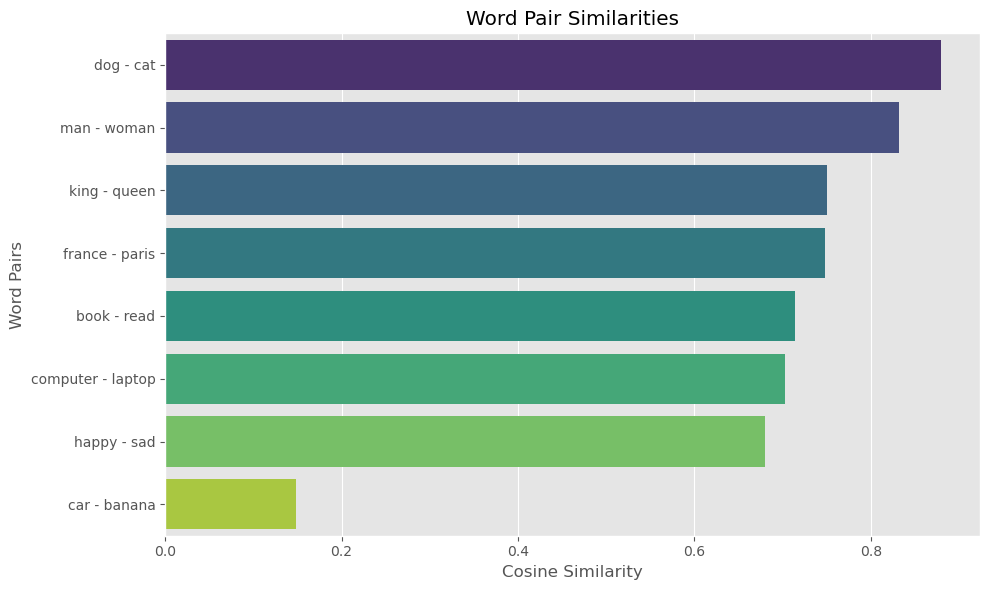

In [4]:
def calculate_similarity(word1, word2, model):
    """Calculate cosine similarity between two words"""
    if word1 in model and word2 in model:
        similarity = model.similarity(word1, word2)
        return similarity
    else:
        return None


# Create a table of word similarities
word_pairs = [
    ("king", "queen"),
    ("man", "woman"),
    ("dog", "cat"),
    ("computer", "laptop"),
    ("happy", "sad"),
    ("book", "read"),
    ("france", "paris"),
    ("car", "banana"),  # Unrelated pair
]

similarities = []
for word1, word2 in word_pairs:
    sim = calculate_similarity(word1, word2, glove_model)
    if sim is not None:
        similarities.append((word1, word2, sim))
    else:
        print(f"Couldn't calculate similarity for '{word1}' and '{word2}'")

# Create a DataFrame to display the results
similarity_df = pd.DataFrame(similarities, columns=["Word 1", "Word 2", "Similarity"])
similarity_df = similarity_df.sort_values("Similarity", ascending=False).reset_index(drop=True)

# Display the similarity table
display(similarity_df.style.background_gradient(cmap="viridis"))

# Visualize the similarities
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Similarity",
    y=similarity_df["Word 1"] + " - " + similarity_df["Word 2"],
    data=similarity_df,
    palette="viridis",
)
plt.title("Word Pair Similarities")
plt.xlabel("Cosine Similarity")
plt.ylabel("Word Pairs")
plt.tight_layout()
plt.show()

## Word Analogies: The Magic of Word Embeddings

One of the most fascinating properties of word embeddings is their ability to perform analogical reasoning through vector arithmetic.

For example: king - man + woman ≈ queen


In [5]:
def word_analogy(word1, word2, word3, model, n=5):
    """Find words that solve the analogy: word1 is to word2 as word3 is to ?"""
    if word1 in model and word2 in model and word3 in model:
        try:
            # Get the result of the vector arithmetic
            result = model.most_similar(positive=[word2, word3], negative=[word1], topn=n)
            return result
        except:
            return None
    else:
        return None


# Define some classic word analogies to try
analogies = [
    ("man", "king", "woman"),  # man is to king as woman is to ? (queen)
    ("paris", "france", "rome"),  # paris is to france as rome is to ? (italy)
    ("good", "better", "bad"),  # good is to better as bad is to ? (worse)
    ("walk", "walked", "run"),  # walk is to walked as run is to ? (ran)
]

for word1, word2, word3 in analogies:
    print(f"\n{word1} is to {word2} as {word3} is to ?")
    results = word_analogy(word1, word2, word3, glove_model)
    if results:
        for word, score in results:
            print(f"  {word}: {score:.4f}")
    else:
        print("  Couldn't compute this analogy")


man is to king as woman is to ?
  queen: 0.7699
  monarch: 0.6843
  throne: 0.6756
  daughter: 0.6595
  princess: 0.6521

paris is to france as rome is to ?
  italy: 0.8296
  spain: 0.7102
  germany: 0.6672
  portugal: 0.6548
  roman: 0.6527

good is to better as bad is to ?
  worse: 0.8443
  too: 0.7491
  even: 0.7306
  getting: 0.7304
  because: 0.7299

walk is to walked as run is to ?
  went: 0.7142
  drove: 0.7109
  ran: 0.7099
  came: 0.6869
  last: 0.6609


## Interactive Word Analogy Explorer

Let's create an interactive tool to explore word analogies.


In [6]:
# Create input fields for the analogy
word1_input = widgets.Text(description="Word 1:", placeholder="man")
word2_input = widgets.Text(description="Word 2:", placeholder="king")
word3_input = widgets.Text(description="Word 3:", placeholder="woman")

# Create a button to run the analogy
analogy_button = widgets.Button(description="Solve Analogy", button_style="primary")

# Create an output area
analogy_output = widgets.Output()


# Define the button click handler
def on_analogy_button_clicked(b):
    with analogy_output:
        clear_output()
        word1 = word1_input.value.strip().lower()
        word2 = word2_input.value.strip().lower()
        word3 = word3_input.value.strip().lower()

        if not word1 or not word2 or not word3:
            print("Please fill in all three words.")
            return

        # Check if all words are in the vocabulary
        missing_words = []
        for word, label in [(word1, "Word 1"), (word2, "Word 2"), (word3, "Word 3")]:
            if word not in glove_model:
                missing_words.append(f"{label} ('{word}')")

        if missing_words:
            print(f"The following words are not in the vocabulary: {', '.join(missing_words)}")
            return

        # Compute the analogy
        print(f"Solving: {word1} is to {word2} as {word3} is to ?")
        results = word_analogy(word1, word2, word3, glove_model, n=10)

        if results:
            # Create a DataFrame for the results
            df = pd.DataFrame(results, columns=["Word", "Score"])
            display(df.style.background_gradient(cmap="viridis"))

            # Plot the results
            plt.figure(figsize=(10, 6))
            sns.barplot(x="Score", y="Word", data=df, palette="viridis")
            plt.title(f"{word1} : {word2} :: {word3} : ?")
            plt.xlabel("Similarity Score")
            plt.tight_layout()
            plt.show()

            # Show the vector equation
            print(
                f"\nVector equation: vector('{word2}') - vector('{word1}') + vector('{word3}') ≈ vector('{results[0][0]}')"
            )
        else:
            print("Couldn't compute this analogy.")


# Connect the button to the handler
analogy_button.on_click(on_analogy_button_clicked)

# Create example buttons for quick testing
examples = [
    ("king", "man", "woman"),
    ("france", "paris", "italy"),
    ("good", "better", "bad"),
    ("walk", "walked", "run"),
]

example_buttons = []
for w1, w2, w3 in examples:
    button = widgets.Button(description=f"{w1}:{w2}::{w3}:?", layout=widgets.Layout(width="auto"))

    def create_handler(word1, word2, word3):
        def handler(b):
            word1_input.value = word1
            word2_input.value = word2
            word3_input.value = word3
            on_analogy_button_clicked(None)

        return handler

    button.on_click(create_handler(w1, w2, w3))
    example_buttons.append(button)

# Layout the widgets
display(widgets.HTML("<h3>Word Analogy Explorer</h3>"))
display(
    widgets.HTML(
        "<p>Fill in the words to solve the analogy: Word1 is to Word2 as Word3 is to ?</p>"
    )
)
display(widgets.HBox([word1_input, word2_input, word3_input]))
display(widgets.HBox([analogy_button]))
display(widgets.HTML("<p>Or try one of these examples:</p>"))
display(widgets.HBox(example_buttons))
display(analogy_output)

HTML(value='<h3>Word Analogy Explorer</h3>')

HTML(value='<p>Fill in the words to solve the analogy: Word1 is to Word2 as Word3 is to ?</p>')

HTML(value='<p>Or try one of these examples:</p>')

Output()

## Visualizing Word Embeddings in Lower Dimensions

Word vectors typically have high dimensionality (e.g., 100, 300 dimensions), which makes them difficult to visualize directly. Let's use dimension reduction techniques like PCA and t-SNE to visualize them in 2D and 3D.


In [7]:
def get_word_vectors(words, model):
    """Get vectors for a list of words, filtering out those not in the model"""
    vectors = []
    valid_words = []
    for word in words:
        if word in model:
            vectors.append(model[word])
            valid_words.append(word)
        else:
            print(f"Warning: '{word}' not found in vocabulary")
    return np.array(vectors), valid_words


def reduce_dimensions(vectors, method="pca", dimensions=2):
    """Reduce dimensionality of vectors for visualization"""
    if method.lower() == "pca":
        reducer = PCA(n_components=dimensions)
    else:  # t-SNE
        reducer = TSNE(
            n_components=dimensions, random_state=42, perplexity=min(30, len(vectors) - 1)
        )

    reduced_vectors = reducer.fit_transform(vectors)
    return reduced_vectors


# Sample categories of words to visualize
word_categories = {
    "Countries": [
        "usa",
        "canada",
        "mexico",
        "france",
        "germany",
        "italy",
        "japan",
        "china",
        "australia",
        "brazil",
    ],
    "Animals": [
        "dog",
        "cat",
        "horse",
        "lion",
        "tiger",
        "elephant",
        "giraffe",
        "zebra",
        "snake",
        "fish",
    ],
    "Technology": [
        "computer",
        "smartphone",
        "internet",
        "software",
        "hardware",
        "robot",
        "algorithm",
        "data",
        "network",
        "coding",
    ],
    "Colors": [
        "red",
        "blue",
        "green",
        "yellow",
        "purple",
        "orange",
        "black",
        "white",
        "brown",
        "pink",
    ],
    "Food": [
        "pizza",
        "burger",
        "pasta",
        "sushi",
        "rice",
        "bread",
        "cheese",
        "apple",
        "banana",
        "chocolate",
    ],
}

# Create category dropdown
category_dropdown = widgets.Dropdown(
    options=list(word_categories.keys()),
    value=list(word_categories.keys())[0],
    description="Category:",
)

# Create method dropdown
method_dropdown = widgets.Dropdown(options=["PCA", "t-SNE"], value="PCA", description="Method:")

# Create dimension dropdown
dim_dropdown = widgets.Dropdown(options=[("2D", 2), ("3D", 3)], value=2, description="Dimensions:")

# Create custom word input
custom_words_input = widgets.Text(
    value="",
    placeholder="Enter comma-separated words",
    description="Custom words:",
    layout=widgets.Layout(width="80%"),
)

# Create visualization button
viz_button = widgets.Button(description="Visualize", button_style="primary")

# Create output area
viz_output = widgets.Output()


# Define button click handler
def on_viz_button_clicked(b):
    with viz_output:
        clear_output()

        # Get words to visualize
        if custom_words_input.value.strip():
            # Use custom words
            words = [w.strip().lower() for w in custom_words_input.value.split(",")]
            title = "Custom Words"
        else:
            # Use category
            category = category_dropdown.value
            words = word_categories[category]
            title = category

        # Get vectors
        vectors, valid_words = get_word_vectors(words, glove_model)

        if len(valid_words) < 2:
            print("Need at least 2 valid words for visualization.")
            return

        # Reduce dimensions
        method = method_dropdown.value.lower()
        dimensions = dim_dropdown.value
        reduced_vecs = reduce_dimensions(vectors, method, dimensions)

        # Create DataFrame for plotting
        if dimensions == 2:
            df = pd.DataFrame(
                {"x": reduced_vecs[:, 0], "y": reduced_vecs[:, 1], "word": valid_words}
            )

            # Create interactive plot with Plotly
            fig = px.scatter(
                df, x="x", y="y", text="word", title=f"{title} - {method.upper()} 2D projection"
            )
            fig.update_traces(textposition="top center", marker=dict(size=10))
            fig.update_layout(
                xaxis_title=f"{method.upper()} Dimension 1",
                yaxis_title=f"{method.upper()} Dimension 2",
            )
            fig.show()

        else:  # 3D
            df = pd.DataFrame(
                {
                    "x": reduced_vecs[:, 0],
                    "y": reduced_vecs[:, 1],
                    "z": reduced_vecs[:, 2],
                    "word": valid_words,
                }
            )

            # Create interactive 3D plot with Plotly
            fig = px.scatter_3d(
                df,
                x="x",
                y="y",
                z="z",
                text="word",
                title=f"{title} - {method.upper()} 3D projection",
            )
            fig.update_traces(marker=dict(size=5))
            fig.show()


# Connect the button to the handler
viz_button.on_click(on_viz_button_clicked)

# Layout the widgets
display(widgets.HTML("<h3>Word Embedding Visualization</h3>"))
display(widgets.HBox([category_dropdown, method_dropdown, dim_dropdown]))
display(custom_words_input)
display(viz_button)
display(viz_output)

HTML(value='<h3>Word Embedding Visualization</h3>')

Text(value='', description='Custom words:', layout=Layout(width='80%'), placeholder='Enter comma-separated wor…

Button(button_style='primary', description='Visualize', style=ButtonStyle())

Output()

## Nearest Neighbors Explorer

Let's create a tool to find the nearest neighbors of words in the embedding space.


In [ ]:
def find_nearest_neighbors(word, model, n=10):
    """Find the n nearest neighbors of a word in the embedding space"""
    if word in model:
        return model.most_similar(word, topn=n)
    else:
        return None


# Create input field for the word
nn_word_input = widgets.Text(value="", placeholder="Enter a word", description="Word:")

# Create a slider for the number of neighbors
nn_count_slider = widgets.IntSlider(value=10, min=5, max=50, step=5, description="Neighbors:")

# Create a button to find neighbors
nn_button = widgets.Button(description="Find Neighbors", button_style="primary")

# Create an output area
nn_output = widgets.Output()


# Define the button click handler
def on_nn_button_clicked(b):
    with nn_output:
        clear_output()
        word = nn_word_input.value.strip().lower()
        n = nn_count_slider.value

        if not word:
            print("Please enter a word.")
            return

        if word not in glove_model:
            print(f"Word '{word}' not found in vocabulary.")
            return

        # Find nearest neighbors
        neighbors = find_nearest_neighbors(word, glove_model, n)

        if neighbors:
            # Create a DataFrame for the results
            df = pd.DataFrame(neighbors, columns=["Word", "Similarity"])
            display(df.style.background_gradient(cmap="viridis"))

            # Visualize the similarities
            plt.figure(figsize=(10, max(6, n / 4)))
            sns.barplot(x="Similarity", y="Word", data=df, palette="viridis")
            plt.title(f"Words Most Similar to '{word}'")
            plt.xlabel("Cosine Similarity")
            plt.tight_layout()
            plt.show()

            # Visualize in 2D space
            # Get vectors for word and its neighbors
            all_words = [word] + [w for w, _ in neighbors]
            vectors, valid_words = get_word_vectors(all_words, glove_model)

            # Reduce to 2D
            reduced_vecs = reduce_dimensions(vectors, "pca", 2)

            # Create DataFrame for plotting
            df_viz = pd.DataFrame(
                {
                    "x": reduced_vecs[:, 0],
                    "y": reduced_vecs[:, 1],
                    "word": valid_words,
                    "is_query": [w == word for w in valid_words],
                }
            )

            # Create plot
            plt.figure(figsize=(10, 8))
            # Plot neighbors
            plt.scatter(
                df_viz[~df_viz.is_query]["x"],
                df_viz[~df_viz.is_query]["y"],
                c="blue",
                alpha=0.7,
                s=100,
            )
            # Plot query word
            plt.scatter(
                df_viz[df_viz.is_query]["x"],
                df_viz[df_viz.is_query]["y"],
                c="red",
                s=200,
                label=f"Query: '{word}'",
            )

            # Add labels
            for i, row in df_viz.iterrows():
                plt.annotate(row["word"], (row["x"], row["y"]), fontsize=12, ha="center")

            plt.title(f"'{word}' and its nearest neighbors in 2D space")
            plt.legend()
            plt.grid(True, linestyle="--", alpha=0.7)
            plt.tight_layout()
            plt.show()

        else:
            print("Couldn't find neighbors for this word.")


# Connect the button to the handler
nn_button.on_click(on_nn_button_clicked)

# Create example words for quick testing
example_words = ["king", "computer", "happy", "science", "money", "food"]
example_buttons = []

for word in example_words:
    button = widgets.Button(description=word, layout=widgets.Layout(width="auto"))

    def create_handler(w):
        def handler(b):
            nn_word_input.value = w
            on_nn_button_clicked(None)

        return handler

    button.on_click(create_handler(word))
    example_buttons.append(button)

# Layout the widgets
display(widgets.HTML("<h3>Nearest Neighbors Explorer</h3>"))
display(widgets.HBox([nn_word_input, nn_count_slider]))
display(widgets.HBox([nn_button]))
display(widgets.HTML("<p>Or try one of these examples:</p>"))
display(widgets.HBox(example_buttons))
display(nn_output)

## Key Takeaways

1. **Word embeddings represent words as vectors** in a high-dimensional space, where semantically similar words appear close together.

2. **Vector arithmetic works with word meanings**: The famous example king - man + woman ≈ queen demonstrates how embeddings capture semantic relationships.

3. **Word embeddings capture multiple types of relationships**:

   - Semantic similarity (cat/dog)
   - Analogical relationships (Paris/France :: Rome/Italy)
   - Syntactic patterns (walk/walked :: run/ran)

4. **Dimensionality reduction** techniques like PCA and t-SNE allow us to visualize the relationships between words.

5. **Nearest neighbors** in the embedding space reflect semantic and functional similarity between words.

6. **Pre-trained embeddings** like Word2Vec, GloVe, and FastText capture rich semantic information from large text corpora.


## Applications of Word Embeddings

Word embeddings are used in a wide range of NLP applications:

1. **Search engines**: Finding related terms and improving query understanding
2. **Recommendation systems**: Suggesting similar items based on textual descriptions
3. **Machine translation**: Mapping words across languages in a shared semantic space
4. **Sentiment analysis**: Understanding the emotional valence of words
5. **Document classification**: Representing document content for categorization
6. **Named entity recognition**: Identifying and classifying named entities in text

Word embeddings serve as the foundation for more advanced language models like BERT, GPT, and other transformer architectures.

## Further Reading

- [Word2Vec](https://arxiv.org/abs/1301.3781): Original paper introducing the Word2Vec model
- [GloVe](https://nlp.stanford.edu/projects/glove/): Global Vectors for Word Representation
- [FastText](https://fasttext.cc/): Enriching Word Vectors with Subword Information
- [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781)
- [Gensim Documentation](https://radimrehurek.com/gensim/): Library for topic modeling and document similarity
